# Trabajo práctico integrador

**Nombre**:

## Primera Parte (Clase 1 y 2)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [15]:
x = np.random.randint(5, size=(3,3))
print("La matriz es: \n",x)


def norms(p):
    size = len(x)
    for i in range(size):
        if p != 0 and p != np.inf:
            norm_p = np.sum(abs(x[i]) ** p) ** (1/p)
            if p == 1:
                print(f"Las norma l1 del vector {i+1}: ",norm_p)
            else:
                print(f"Las normas l2 de los vector {i+1}: ",norm_p)
        elif p == 0:
            norm_p = np.sum(abs(x[i]) != 0) #cantidad de elementos no nulos
            print(f"Las norma l0 de los vector {i+1}: ",norm_p)
        else:
            norm_p = np.max((abs(x[i])))
            print(f"La norma inf del vector {i+1}: ",norm_p)
    return 0

#norm l1
p_l1 = 1
norms(p_l1)

#norm l2
p_l2 = 2
norms(p_l2)

#norm l0
p_l0 = 0
norms(p_l0)

#norm inf
p_linf = np.inf
norms(p_linf)

La matriz es: 
 [[1 0 1]
 [1 0 1]
 [4 3 0]]
Las norma l1 del vector 1:  2.0
Las norma l1 del vector 2:  2.0
Las norma l1 del vector 3:  7.0
Las normas l2 de los vector 1:  1.4142135623730951
Las normas l2 de los vector 2:  1.4142135623730951
Las normas l2 de los vector 3:  5.0
Las norma l0 de los vector 1:  2
Las norma l0 de los vector 2:  2
Las norma l0 de los vector 3:  2
La norma inf del vector 1:  1
La norma inf del vector 2:  1
La norma inf del vector 3:  4


0

### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [16]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

#using logical AND to get the TP op: 1 and 1 = true
compare01_and = np.logical_and(truth,prediction)
print(compare01_and)
#seeking true values and sum them to get tp
tp_rate = len(compare01_and[np.nonzero(compare01_and == 1)])
print("TP: ",tp_rate)

#using logical OR since there should be just one false = 0 or 0 
compare02 = np.logical_or(truth,prediction)
print(compare02)
#seeking true values and sum them to get tn
tn_rate = len(compare02[np.nonzero(compare02 == 0)])
print("TN: ",tn_rate)

#using XOR against first AND vs truth array will give me FN
compare03 = np.logical_xor(compare01_and,truth)
print(compare03)
#getting the rate of FN
fn_rate = len(compare03[np.nonzero(compare03 == 1)])
print("FN: ",fn_rate)

compare04 = np.logical_xor(compare01_and,prediction)
print(compare04)
fp_rate = len(compare04[np.nonzero(compare04 == 1)])
print("FP: ",fp_rate)

precision = (tp_rate)/(tp_rate + fp_rate)
recall = (tp_rate)/(tp_rate + fn_rate)
accuracy = (tp_rate + tn_rate)/(tp_rate + tn_rate + fp_rate + fn_rate)
print(f"Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}")

[ True  True False  True False False False False False False]
TP:  3
[ True  True  True  True  True  True  True  True False  True]
TN:  1
[False False False False  True  True False False False  True]
FN:  3
[False False  True False False False  True  True False False]
FP:  3
Precision: 0.5, Recall: 0.5, Accuracy: 0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [43]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
# ejercicio 3
# exporting data HAR dataset
PATH_DS = "./data/UCI_HAR_Dataset/train/"
X_train = np.loadtxt(os.path.join(PATH_DS, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DS, "y_train.txt")).astype(int)

#Exploring data
print(f"features size: {X_train.shape}")
print(f"labels size: {y_train.shape}")

features size: (7352, 561)
labels size: (7352,)


In [45]:
df = pd.DataFrame(X_train)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,0.145844,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,0.136382,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.314038,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.267383,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417


In [46]:
#checking missing values
df.isnull().sum().sum()

0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [48]:
#Checking unique clases
num_class = np.unique(y_train)
print(f"number of classes: {num_class}")

number of classes: [1 2 3 4 5 6]


/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/1780264417.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


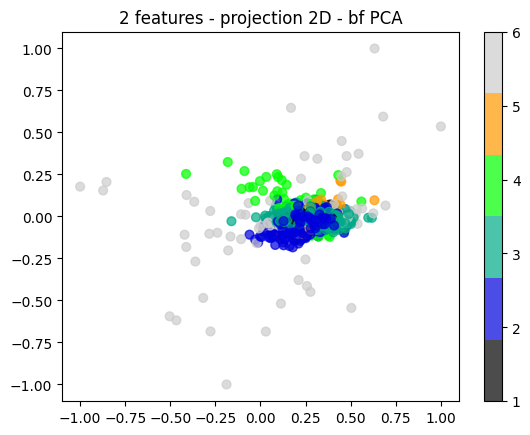

In [49]:
#Grahp of the first two features
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('2 features - projection 2D - bf PCA');

In [50]:
#Standardize features as part of the requirements for using PCA
standardizer = StandardScaler()
standardizer.fit(X_train)
feature_scaled = standardizer.transform(X_train)

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/1869687989.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(feature_scaled[:, 0], feature_scaled[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


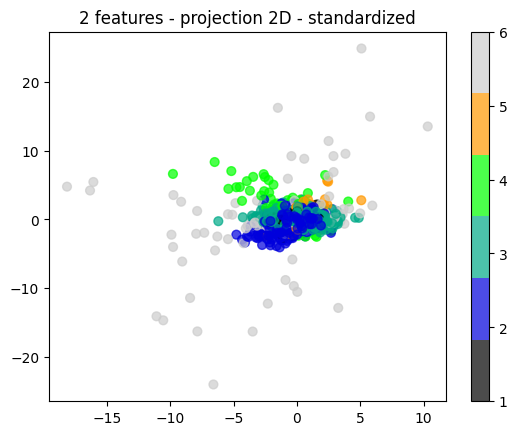

In [51]:
#Grahp of the first two features after standardize
plt.scatter(feature_scaled[:, 0], feature_scaled[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('2 features - projection 2D - standardized');

In [52]:
#Applying PCA
pca = PCA(n_components=0.8)
pca.fit(feature_scaled)
feature_reduced = pca.transform(feature_scaled)

#checking new size
feature_reduced.shape

(7352, 26)

In [53]:
#Need at least 26 components with 80% of variance
feature_reduced.shape[1]

26

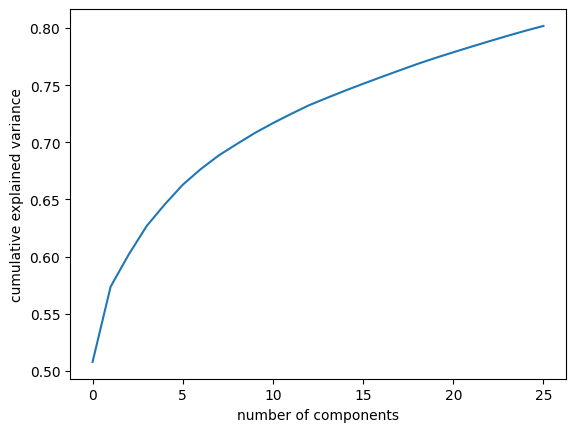

In [54]:
#Graph acumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/1498700086.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(feature_reduced[:, 0], feature_reduced[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


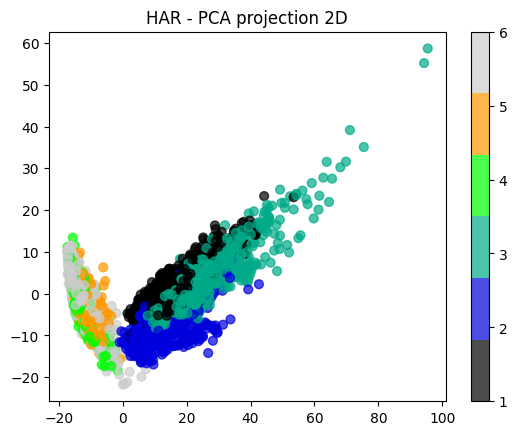

In [55]:
#Grahp PCA with two components
plt.scatter(feature_reduced[:, 0], feature_reduced[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/3690772936.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(feature_reduced[:, 0], feature_reduced[:, 1], c=cluster_labels, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/3690772936.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(centroids[:, 0], centroids[:, 1],c='red',marker='*', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/3690772936.py:9: UserWarning: No data for colormapping provided via 'c'. Para

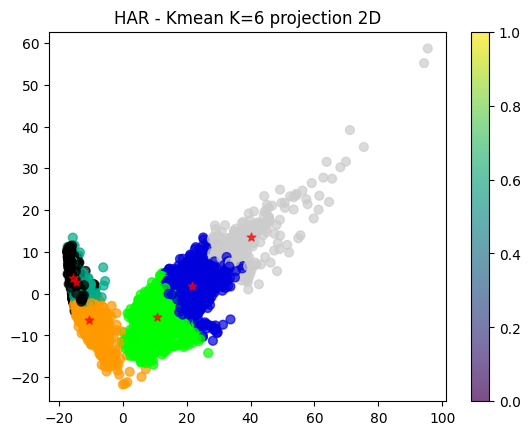

In [56]:
#Starting Kmean using n_init by default wiht 10 and k=6
kmeans = KMeans(n_clusters=6,n_init=10)
kmeans.fit(feature_reduced)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#Grahp with Kmeans with k=6
plt.scatter(feature_reduced[:, 0], feature_reduced[:, 1], c=cluster_labels, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.scatter(centroids[:, 0], centroids[:, 1],c='red',marker='*', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - Kmean K=6 projection 2D');

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/1772357488.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(feature_reduced[:, 0], feature_reduced[:, 1], c=cluster_labels_02, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/1772357488.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(centroids_02[:, 0], centroids_02[:, 1],c='red',marker='*', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/1772357488.py:9: UserWarning: No data for colormapping provided via 

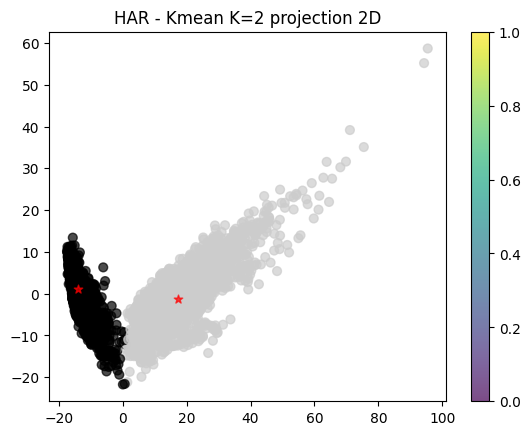

In [57]:
#Starting Kmean using n_init by default wiht 10 and k=2
kmeans_02 = KMeans(n_clusters=2,n_init=10)
kmeans_02.fit(feature_reduced)
cluster_labels_02 = kmeans_02.labels_
centroids_02 = kmeans_02.cluster_centers_

#Grahp with Kmeans with k=2
plt.scatter(feature_reduced[:, 0], feature_reduced[:, 1], c=cluster_labels_02, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.scatter(centroids_02[:, 0], centroids_02[:, 1],c='red',marker='*', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - Kmean K=2 projection 2D');

In [65]:
#Ejercicio 4
digits = load_digits()

X_train02 = digits.data
y_train02 = digits.target

#Exploring data
print(f"features size: {X_train02.shape}")
print(f"labels size: {y_train02.shape}")

features size: (1797, 64)
labels size: (1797,)


In [66]:
df02 = pd.DataFrame(X_train02)
df02.head(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [67]:
#checking missing values
df02.isnull().sum().sum()

0

In [68]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [69]:
#Checking unique clases
num_class02 = np.unique(y_train02)
print(f"number of classes: {num_class02}")

number of classes: [0 1 2 3 4 5 6 7 8 9]


/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/113525551.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_train02[:, 0], X_train02[:, 1], c=y_train02, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))


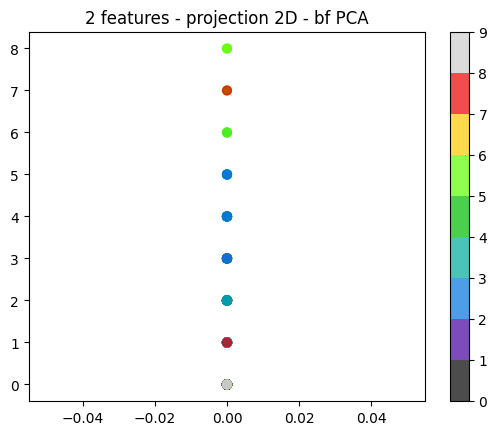

In [79]:
#Grahp of the first two features
plt.scatter(X_train02[:, 0], X_train02[:, 1], c=y_train02, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('2 features - projection 2D - bf PCA');

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/529773611.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(feature_scaled02[:, 0], feature_scaled02[:, 1], c=y_train02, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))


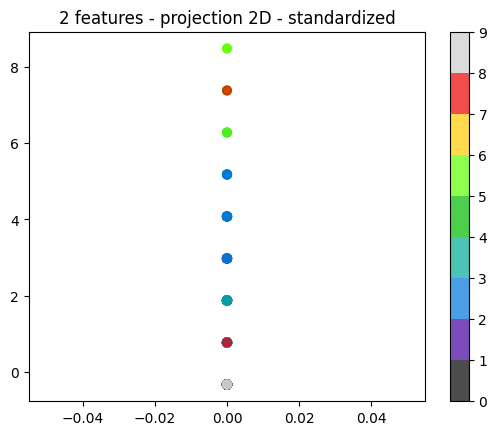

In [94]:
#Standardize features as part of the requirements for using PCA
standardizer02 = StandardScaler()
standardizer02.fit(X_train02)
feature_scaled02 = standardizer02.transform(X_train02)

#Grahp of the first two features after standardize
plt.scatter(feature_scaled02[:, 0], feature_scaled02[:, 1], c=y_train02, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('2 features - projection 2D - standardized');

In [95]:
#Applying PCA
pca02 = PCA(n_components=0.8)
pca02.fit(feature_scaled02)
feature_reduced02 = pca02.transform(feature_scaled02)

#checking new size
feature_reduced02.shape

(1797, 21)

In [99]:
#Need at least 21 components with 80% of variance
feature_reduced02.shape[1]

21

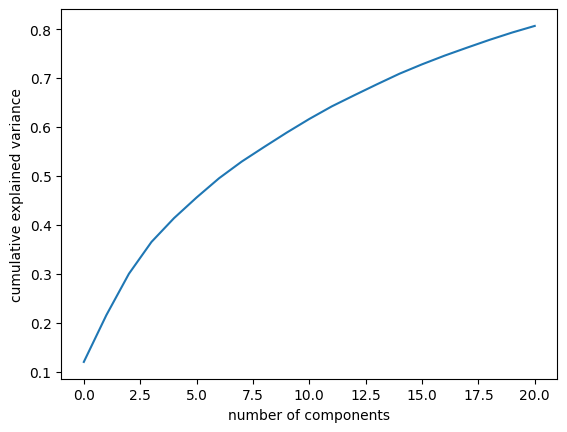

In [100]:
#Graph acumulative variance
plt.plot(np.cumsum(pca02.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/605869793.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(feature_reduced02[:, 0], feature_reduced02[:, 1], c=y_train02, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))


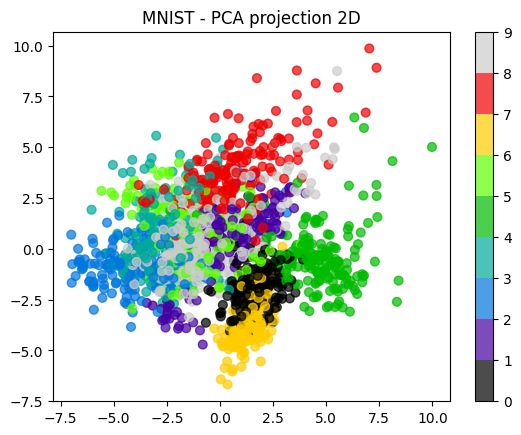

In [108]:
#Grahp PCA with two components
plt.scatter(feature_reduced02[:, 0], feature_reduced02[:, 1], c=y_train02, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - PCA projection 2D');

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/413248943.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(feature_reduced02[:, 0], feature_reduced02[:, 1], c=cluster_labels03, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))
/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/413248943.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(centroids03[:, 0], centroids03[:, 1],c='red',marker='*', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))
/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/413248943.py:9: UserWarning: No data for colormapping provided via 'c

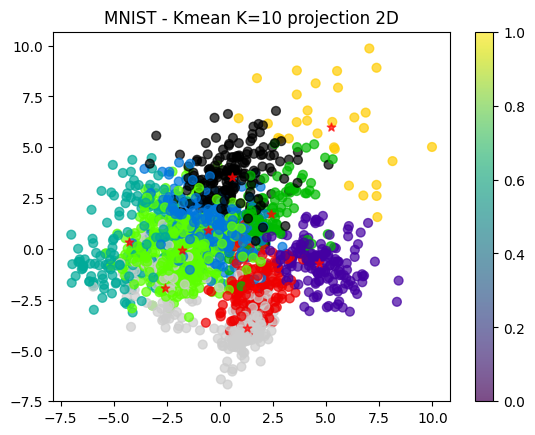

In [107]:
#Starting Kmean using n_init by default wiht 10 and k=10
kmeans03 = KMeans(n_clusters=10,n_init=100)
kmeans03.fit(feature_reduced02)
cluster_labels03 = kmeans03.labels_
centroids03 = kmeans03.cluster_centers_

#Grahp with Kmeans with k=6
plt.scatter(feature_reduced02[:, 0], feature_reduced02[:, 1], c=cluster_labels03, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))
plt.scatter(centroids03[:, 0], centroids03[:, 1],c='red',marker='*', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - Kmean K=10 projection 2D');

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/1444878977.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(feature_reduced02[:, 0], feature_reduced02[:, 1], c=cluster_labels04, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/1444878977.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(centroids04[:, 0], centroids04[:, 1],c='red',marker='*', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2370/1444878977.py:9: UserWarning: No data for colormapping provided via

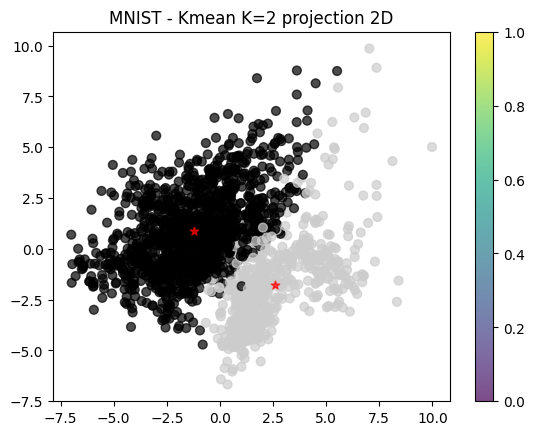

In [110]:
#Starting Kmean using n_init by default wiht 10 and k=2
kmeans04 = KMeans(n_clusters=2,n_init=100)
kmeans04.fit(feature_reduced02)
cluster_labels04 = kmeans04.labels_
centroids04 = kmeans04.cluster_centers_

#Grahp with Kmeans with k=2
plt.scatter(feature_reduced02[:, 0], feature_reduced02[:, 1], c=cluster_labels04, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.scatter(centroids04[:, 0], centroids04[:, 1],c='red',marker='*', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - Kmean K=2 projection 2D');

### Analisis

## Segunda Parte (Clase 3 y 4)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [8]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [9]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


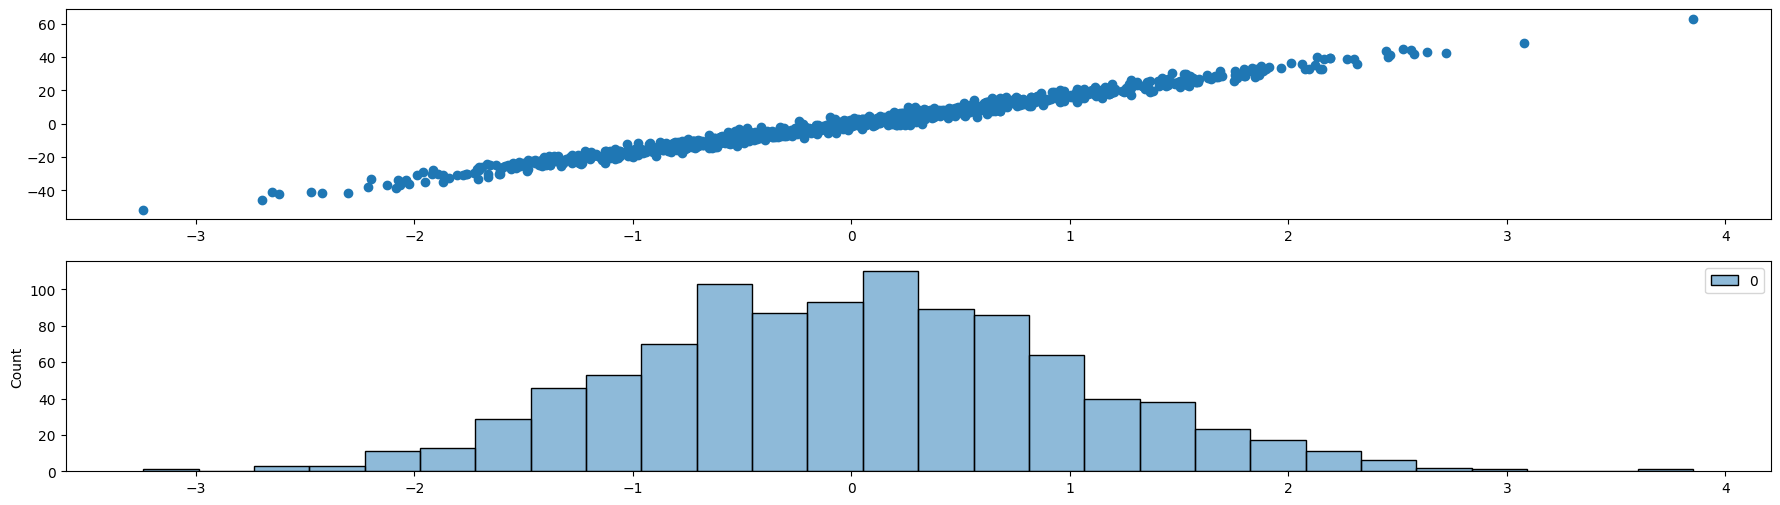

In [10]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [12]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [13]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

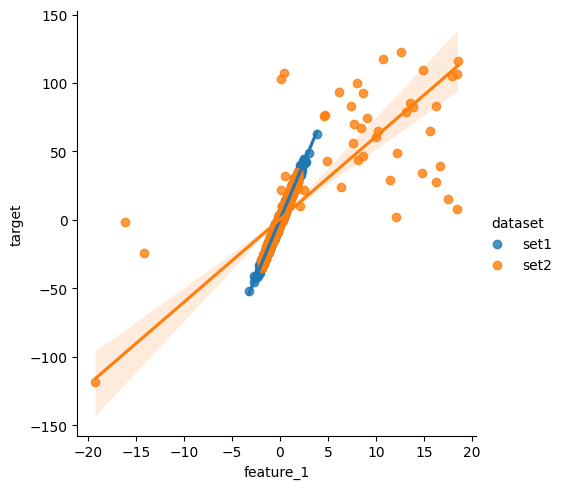

In [14]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset:
    Number-of-cars  Rush-hour
0              44          1
1              92          1
2             179          1
3              93          1
4              86          1

Dataset total size: 20
training percentage: 0.7
test percentage: 0.1
trianing rows [18  1 19  8 10 17  6 13  4  2  5 14  9  7]
validation rows [16 11  3  0]
test rows[15 12]
Total training data:  (14,)
Total validation data:  (4,)
Total test data:  (2,)


<function matplotlib.pyplot.show(close=None, block=None)>

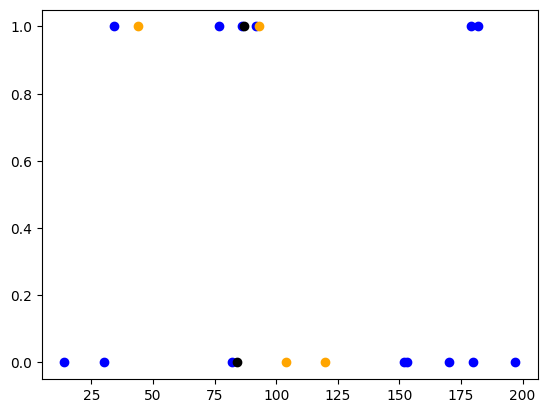

In [12]:
def split(df: pd.DataFrame, train_percentage: float, test_percentage: float):
    
    #defining X
    x_layer = df['Number-of-cars']
    #defining y
    y_layer = df['Rush-hour']

    np.random.seed(0)
    df_length = len(df)
    train_size = int(df_length * train_percentage)

    #Permuting rows in the dataset to avoid any kind of pattern
    permute_index = np.random.permutation(df_length)
    #get train data using slicing
    train_df = permute_index[0:train_size]
    print(f"trianing rows {train_df}")
    #get validation data using slicing
    valid_df = permute_index[train_size:int(df_length - test_percentage * df_length)]
    print(f"validation rows {valid_df}")
    #get test data
    test_df = permute_index[int(df_length - test_percentage * df_length):df_length]
    print(f"test rows{test_df}")
    
    #X train-validation-test
    X_train = x_layer[train_df]
    X_val = x_layer[valid_df]
    X_test = x_layer[test_df]

    #X train-validation-test
    Y_train = y_layer[train_df]
    Y_val = y_layer[valid_df]
    Y_test =y_layer[test_df]

    return  X_train, X_val, X_test, Y_train, Y_val, Y_test

#Generating data
num_car = np.random.randint(5,200, size=(20))
rush_hour = np.random.binomial(1,0.5,size=[20])
data = {'Number-of-cars': num_car, 
        'Rush-hour': rush_hour}
#print(f"Generating data:\n {data}\n")
#Generating data frame
df = pd.DataFrame(data)
print(f"Dataset:\n {df.head()}\n")
print(f"Dataset total size: {len(df)}")
#training size
train_percentage = 0.7
print(f"training percentage: {train_percentage}")
#test size
test_percentage = 0.1
print(f"test percentage: {test_percentage}")

#splitting dataset in train, validation and test
X_train, X_val, X_test, Y_train, Y_val, Y_test = split(df, train_percentage, test_percentage)

print("Total training data: ",X_train.shape)
print("Total validation data: ",X_val.shape)
print("Total test data: ",X_test.shape)

plt.scatter(X_train, Y_train, color='blue')
plt.scatter(X_test, Y_test, color = 'black')
plt.scatter(X_val, Y_val, color='orange')
plt.show

### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
* Uno normal con poco `noise` y pocos outliers
* Uno con mucho `noise` y pocos outliers
* Uno con poco `noise` y muchos outliers
* Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV

# Crear datasets
from sklearn.datasets import make_regression

In [74]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [75]:
# Creamos funcion que arma dataset
def dataset_build(samples: int, feature: int, noi: int, infor: int, random: int):
    x_input01, y_output01 = make_regression(n_samples = samples,
                        n_features = feature,
                        noise = noi,
                        n_informative = infor,
                        random_state = random)

    data = np.append(x_input01,y_output01.reshape(-1,1),axis=1)

    df = pd.DataFrame(data)

    new_col = []
    i = 0
    for col in df.columns:
        if i ==  len(df.columns) - 1:
            new_col.append("target")
        else :
            new_col.append("feature_" + str(i+1))
        i += 1
        
    df.columns = new_col
    print(df.columns)
    return df

In [76]:
#Dataset normal con poco noise y pocos outliers
dataset_01 = dataset_build(samples = 1000, feature = 1, noi = 1, infor = 1, random = 42)
dataset_01.head()

Index(['feature_1', 'target'], dtype='object')


,feature_1,target
0,-1.758739,-29.787279
1,1.031845,15.903898
2,-0.487606,-9.142930
3,0.186454,2.411486
4,0.725767,12.250321


In [77]:
#Dataset con mucho noise y pocos outliers
dataset_02 = dataset_build(samples = 1000, feature = 1, noi = 10, infor = 1, random = 42)
dataset_02.head()

Index(['feature_1', 'target'], dtype='object')


,feature_1,target
0,-1.758739,-32.770386
1,1.031845,3.504591
2,-0.487606,-17.930308
3,0.186454,-3.990201
4,0.725767,13.105264


In [78]:
#Dataset con poco noise y muchos outliers
dataset_03 = dataset_build(samples = 1000, feature = 10, noi = 1, infor = 5, random = 42)
dataset_03.head()

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'target'],
      dtype='object')


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.123429,-1.253402,0.370340,0.101788,0.092628,-0.589254,0.306348,-1.458213,1.630130,1.242863,25.295046
1,-0.216827,0.214983,-0.028817,-1.701140,0.264482,0.314972,0.374062,-0.292758,0.501900,0.063702,-60.487743
2,0.388979,1.655407,-0.755792,-1.161784,-0.300860,1.048707,-0.283139,0.251474,-0.194269,-1.209477,-30.914379
3,0.219072,-0.251552,-1.095871,-0.806520,-0.435139,2.768374,1.677201,-0.475392,-0.835870,-1.314879,-10.321053
4,0.715734,0.383168,-0.686715,-1.236136,0.731001,1.623885,1.254338,2.394362,2.185095,0.538435,23.386267


In [79]:
#Dataset con mucho noise y muchos outliers
dataset_04 = dataset_build(samples = 500, feature = 10, noi = 10, infor = 5, random = 42)
dataset_04.head()

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'target'],
      dtype='object')


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-1.222895,-0.918127,1.331339,1.239584,-0.396230,-1.293508,1.920368,0.071254,2.124771,-0.695695,92.019588
1,-1.106526,-0.024125,1.126565,0.198085,-0.144360,0.059218,-0.268889,2.573360,1.848956,0.013929,72.151179
2,0.184551,1.208366,2.558199,1.024063,0.592527,2.006093,-0.564248,1.542110,-0.551858,2.061504,66.653581
3,0.558140,-1.151014,0.463289,0.386323,-0.204471,-0.296607,0.043515,-2.529560,0.414866,0.241322,-22.062964
4,-0.147603,-0.532701,-1.768439,-1.169917,-2.872262,-1.594703,0.323168,-0.466037,0.140886,0.513600,-49.635986


In [80]:
#outlier for dataset01 
df_outlier01 = generate_outliers(dataset_01,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

In [81]:
#spliting function
def split(df: pd.DataFrame, train_percentage: float, test_percentage: float):
    
    #defining X
    x_layer = df['feature_1']
    #defining y
    y_layer = df['target']

    np.random.seed(0)
    df_length = len(df)
    train_size = int(df_length * train_percentage)

    #Permuting rows in the dataset to avoid any kind of pattern
    permute_index = np.random.permutation(df_length)
    #get train data using slicing
    train_df = permute_index[0:train_size]

    #get validation data using slicing
    valid_df = permute_index[train_size:int(df_length - test_percentage * df_length)]
    
    #get test data
    test_df = permute_index[int(df_length - test_percentage * df_length):df_length]
    
    
    #X train-validation-test
    X_train = x_layer[train_df]
    X_val = x_layer[valid_df]
    X_test = x_layer[test_df]

    #X train-validation-test
    Y_train = y_layer[train_df]
    Y_val = y_layer[valid_df]
    Y_test =y_layer[test_df]

    return  X_train, X_val, X_test, Y_train, Y_val, Y_test

0.6170215911592549
0.5821038620661165
0.6148818839375307


/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

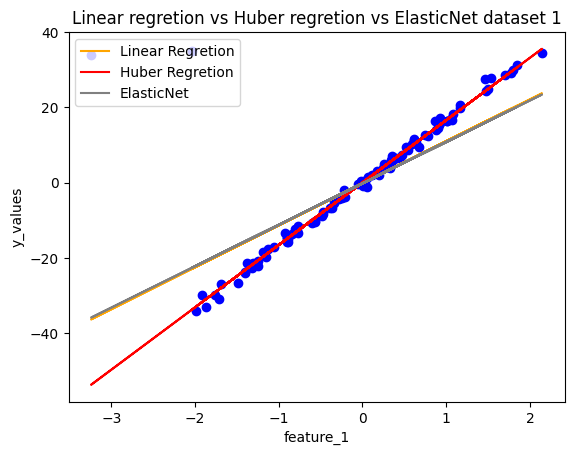

In [82]:
#get data splitted in train validation and test for dataset01
train_percentage = 0.7
test_percentage = 0.1
X_train01, X_val01, X_test01, Y_train01, Y_val01, Y_test01 = split(df_outlier01, train_percentage, test_percentage)

#passing tuple to array format and reshaping
X_train01 = np.array(X_train01).reshape(-1,1)
X_test01 = np.array(X_test01).reshape(-1,1)
Y_train01 = np.array(Y_train01).reshape(-1,1)
Y_test01 = np.array(Y_test01).reshape(-1,1)

#Using linear Regression
linear_regression01 = LinearRegression()
linear_regression01.fit(X_train01,Y_train01)
print(linear_regression01.score(X_test01,Y_test01))

#Using Huber Regretion
huber_regresor01 = HuberRegressor()
huber_regresor01.fit(X_train01,Y_train01)
print(huber_regresor01.score(X_test01,Y_test01))

#Using ElasticNetCV
elasticnet_regresor01 = ElasticNetCV()
elasticnet_regresor01.fit(X_train01,Y_train01)
print(elasticnet_regresor01.score(X_test01,Y_test01))

#prediction
predic_linearR_y = linear_regression01.predict(X_test01)
predic_huberR_y = huber_regresor01.predict(X_test01)
predic_elastic_y = elasticnet_regresor01.predict(X_test01)

#building graph
plt.scatter(X_test01,Y_test01,color='blue')
plt.plot(X_test01, predic_linearR_y, color='orange', label ="Linear Regretion")
plt.plot(X_test01, predic_huberR_y, color = 'red', label ="Huber Regretion")
plt.plot(X_test01, predic_elastic_y, color = 'gray', label ="ElasticNet")
plt.legend(loc="upper left")
plt.title("Linear regretion vs Huber regretion vs ElasticNet dataset 1")
plt.ylabel("y_values")
plt.xlabel("feature_1")
plt.show


### analisis
 Como se puede observar en la grafica anterior, donde se le aplico 3 tipos de regresiones lineales a un dataset que tenía poco ruido (Desviación estandar) y pocos outliers (valores fuera de la distribucion esperada). El regresor lineal y el regresor ElasticNet tienen una leve inclinacíon posiblemente producida por el peso de los outliers, mientras que, el regresor Huber al ser un regresor robusto diseñado para asignarle menos peso a los valores que concidera outliers, muestra una mejor precision en la predicción. 

In [83]:
#outlier for dataset02 
df_outlier02 = generate_outliers(dataset_02,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

0.44334236902333024
0.42171503072246896
0.4427197625644812


/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

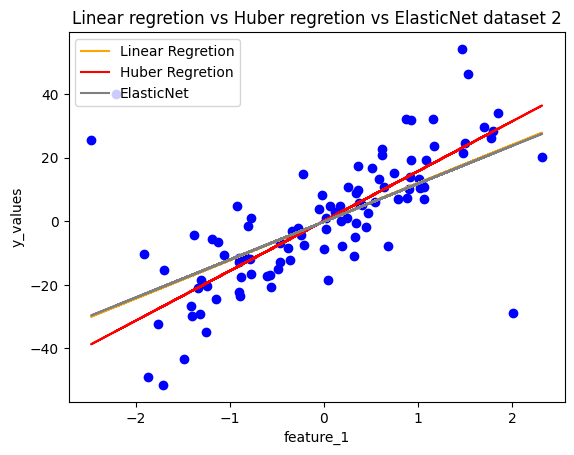

In [84]:
#get data splitted in train validation and test for dataset02
train_percentage = 0.7
test_percentage = 0.1
X_train02, X_val02, X_test02, Y_train02, Y_val02, Y_test02 = split(df_outlier02, train_percentage, test_percentage)

#passing tuple to array format and reshaping
X_train02 = np.array(X_train02).reshape(-1,1)
X_test02 = np.array(X_test02).reshape(-1,1)
Y_train02 = np.array(Y_train02).reshape(-1,1)
Y_test02 = np.array(Y_test02).reshape(-1,1)

#Using linear Regression
linear_regression02 = LinearRegression()
linear_regression02.fit(X_train02,Y_train02)
print(linear_regression02.score(X_test02,Y_test02))

#Using Huber Regretion
huber_regresor02 = HuberRegressor()
huber_regresor02.fit(X_train02,Y_train02)
print(huber_regresor02.score(X_test02,Y_test02))

#Using ElasticNetCV
elasticnet_regresor02 = ElasticNetCV()
elasticnet_regresor02.fit(X_train02,Y_train02)
print(elasticnet_regresor02.score(X_test02,Y_test02))

#prediction
predic_linearR_y02 = linear_regression02.predict(X_test02)
predic_huberR_y02 = huber_regresor02.predict(X_test02)
predic_elastic_y02 = elasticnet_regresor02.predict(X_test02)

#building graph
plt.scatter(X_test02,Y_test02,color='blue')
plt.plot(X_test02, predic_linearR_y02, color='orange',label ="Linear Regretion")
plt.plot(X_test02, predic_huberR_y02, color = 'red',label ="Huber Regretion")
plt.plot(X_test02, predic_elastic_y02, color = 'gray',label ="ElasticNet")
plt.legend(loc="upper left")
plt.title("Linear regretion vs Huber regretion vs ElasticNet dataset 2")
plt.ylabel("y_values")
plt.xlabel("feature_1")
plt.show

### analisis
Como se puede observar en la grafica anterior, donde se le aplico 3 tipos de regresiones lineales a un dataset que tenía mucho ruido (Desviación estandar) y pocos outliers (valores fuera de la distribucion esperada). Incluso con mucho ruido, visualmente el estimador huber parece tener una mejor precision en comparación con los otros dos regresores.

In [85]:
#outlier for dataset03 
df_outlier03 = generate_outliers(dataset_03,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

0.4958000852140386
0.470504038098306
0.4927130353271697


/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

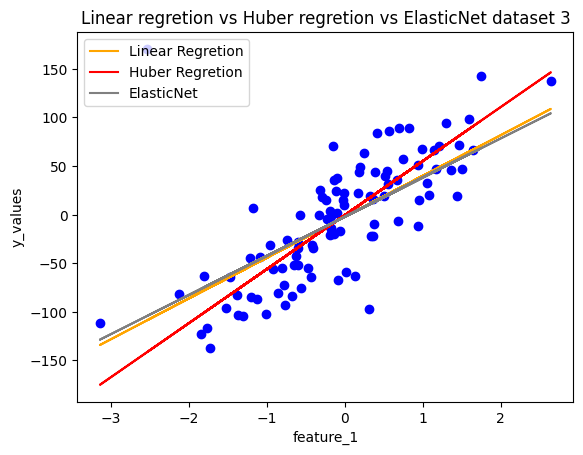

In [86]:
#get data splitted in train validation and test for dataset02
train_percentage = 0.7
test_percentage = 0.1
X_train03, X_val03, X_test03, Y_train03, Y_val03, Y_test03 = split(df_outlier03, train_percentage, test_percentage)

#passing tuple to array format and reshaping
X_train03 = np.array(X_train03).reshape(-1,1)
X_test03 = np.array(X_test03).reshape(-1,1)
Y_train03 = np.array(Y_train03).reshape(-1,1)
Y_test03 = np.array(Y_test03).reshape(-1,1)

#Using linear Regression
linear_regression03 = LinearRegression()
linear_regression03.fit(X_train03,Y_train03)
print(linear_regression03.score(X_test03,Y_test03))

#Using Huber Regretion
huber_regresor03 = HuberRegressor()
huber_regresor03.fit(X_train03,Y_train03)
print(huber_regresor03.score(X_test03,Y_test03))

#Using ElasticNetCV
elasticnet_regresor03 = ElasticNetCV()
elasticnet_regresor03.fit(X_train03,Y_train03)
print(elasticnet_regresor03.score(X_test03,Y_test03))

#prediction
predic_linearR_y03 = linear_regression03.predict(X_test03)
predic_huberR_y03 = huber_regresor03.predict(X_test03)
predic_elastic_y03 = elasticnet_regresor03.predict(X_test03)

#Building graph
plt.plot(X_test03, predic_linearR_y03, color='orange',label ="Linear Regretion")
plt.plot(X_test03, predic_huberR_y03, color = 'red',label ="Huber Regretion")
plt.plot(X_test03, predic_elastic_y03, color = 'gray',label ="ElasticNet")
plt.legend(loc="upper left")
plt.scatter(X_test03,Y_test03,color='blue')
plt.title("Linear regretion vs Huber regretion vs ElasticNet dataset 3")
plt.ylabel("y_values")
plt.xlabel("feature_1")
plt.show

In [87]:
#outlier for dataset04 
df_outlier04 = generate_outliers(dataset_04,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

0.15323581998786662
0.1701758341285028
0.1421107955076928


/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

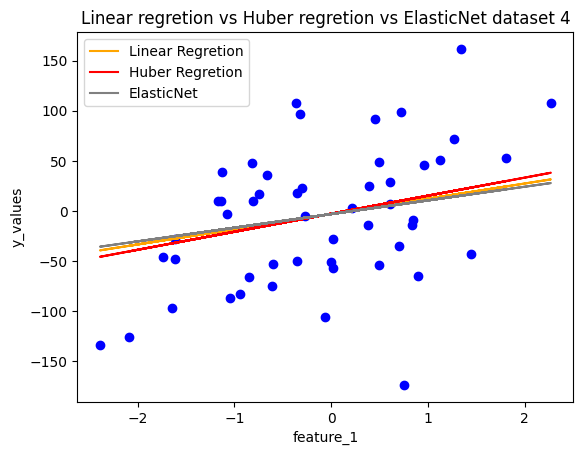

In [88]:
#get data splitted in train validation and test for dataset02
train_percentage = 0.7
test_percentage = 0.1
X_train04, X_val04, X_test04, Y_train04, Y_val04, Y_test04 = split(df_outlier04, train_percentage, test_percentage)

#passing tuple to array format and reshaping
X_train04 = np.array(X_train04).reshape(-1,1)
X_test04 = np.array(X_test04).reshape(-1,1)
Y_train04 = np.array(Y_train04).reshape(-1,1)
Y_test04 = np.array(Y_test04).reshape(-1,1)

#Using linear Regression
linear_regression04 = LinearRegression()
linear_regression04.fit(X_train04,Y_train04)
print(linear_regression04.score(X_test04,Y_test04))

#Using Huber Regretion
huber_regresor04 = HuberRegressor()
huber_regresor04.fit(X_train04,Y_train04)
print(huber_regresor04.score(X_test04,Y_test04))

#Using ElasticNetCV
elasticnet_regresor04 = ElasticNetCV()
elasticnet_regresor04.fit(X_train04,Y_train04)
print(elasticnet_regresor04.score(X_test04,Y_test04))

#prediction
predic_linearR_y04 = linear_regression04.predict(X_test04)
predic_huberR_y04 = huber_regresor04.predict(X_test04)
predic_elastic_y04 = elasticnet_regresor04.predict(X_test04)

#Building graph
plt.plot(X_test04, predic_linearR_y04, color='orange',label ="Linear Regretion")
plt.plot(X_test04, predic_huberR_y04, color = 'red',label ="Huber Regretion")
plt.plot(X_test04, predic_elastic_y04, color = 'gray',label ="ElasticNet")
plt.legend(loc="upper left")
plt.scatter(X_test04,Y_test04,color='blue')
plt.title("Linear regretion vs Huber regretion vs ElasticNet dataset 4")
plt.ylabel("y_values")
plt.xlabel("feature_1")
plt.show

### Analisis
Como se puede observar en la grafica anterior, donde se le aplico 3 tipos de regresiones lineales a un dataset que tenía mucho ruido (Desviación estandar) y muchos outliers (valores fuera de la distribucion esperada). Se puede observar que ante este escenario los 3 regresores se comportan de forma muy similar. El efecto que causa esta cantidad de ruido y outliers afecta de forma considerable la predicción incluso en el regresor más robusto. En este caso se tendría que remover manualmente mucho de los outliers desde la observación.   

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`